In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [2]:
#Read the data in pandas
inp0= pd.read_csv("Dress Sales.csv")
inp1= pd.read_csv("Attribute DataSet.csv")

In [3]:
inp1.columns

Index(['Dress_ID', 'Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'Material', 'FabricType', 'Decoration', 'Pattern Type',
       'Recommendation'],
      dtype='object')

In [4]:
inp1.Price.dtype

dtype('O')

In [5]:
inp1.Price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 479 entries, 0 to 478
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
477 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [6]:
inp1.Price.describe()

count         477
unique          5
top       Average
freq          240
Name: Price, dtype: object

In [7]:
inp1.Price.head()

0        Low
1        Low
2       High
3    Average
4        Low
Name: Price, dtype: object

### **Variable Type:**
- **Numerical variable:** Represents quantities and can be measured and ordered (e.g., price, age, height).
- **Categorical variable:** Represents categories or groups.
#### They can be further divided into:
- **Ordinal:** Categorical variables with a meaningful order or ranking (e.g., low, medium, high).
- **Nominal:** Categorical variables without a meaningful order (e.g., colors, names).

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


In [8]:
# Ans : Object type and categorical ordinal variable

In [9]:
inp1.Recommendation.describe()

count    479.000000
mean       0.427975
std        0.495302
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Recommendation, dtype: float64

In [10]:
inp1.Recommendation.head()

0    1
1    0
2    0
3    1
4    0
Name: Recommendation, dtype: int64

In [11]:
inp1.Recommendation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 479 entries, 0 to 478
Series name: Recommendation
Non-Null Count  Dtype
--------------  -----
479 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [12]:
inp1.Recommendation.dtype

dtype('int64')

There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


In [13]:
# Ans : Integer type and categorical

Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [14]:
# Ans : None of the above

In [15]:
# Print the information about the attributes of inp0 and inp1.
inp0.info()
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

### Fixing the Rows and Columns 

In [16]:
inp1.Size.value_counts()

Size
M        171
free     165
L         93
S         34
XL        14
small      1
s          1
Name: count, dtype: int64

In [17]:
rep = {'M': 'Medium','L': 'Large','XL': 'Extra Large','free': 'Free','S': 'Small','s': 'Small','small': 'Small'}

In [18]:
inp1.Size.replace(rep,inplace = True)

In [19]:
inp1.Size.value_counts()

Size
Medium         171
Free           165
Large           93
Small           36
Extra Large     14
Name: count, dtype: int64

In [20]:
inp1.Size.value_counts() / inp1.Size.count() * 100

Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra Large     2.922756
Name: count, dtype: float64

In [21]:
inp1.Size.value_counts(normalize=True) * 100

Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra Large     2.922756
Name: proportion, dtype: float64

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [22]:
## 2.9%, 35.7%, 7.5%

### Impute/Remove Missing values

In [23]:
# Print the null count of each variables of inp0 and inp1.
inp1.isnull().sum().sort_values(ascending=False)

FabricType        256
Decoration        224
Material          119
Pattern Type      102
NeckLine            3
Price               2
Season              2
SleeveLength        2
Dress_ID            0
Style               0
Rating              0
Size                0
Recommendation      0
dtype: int64

In [24]:
inp0.isnull().sum().sort_values(ascending=False)

10-02-2013    259
10-04-2013    258
30-09-2013    257
10-10-2013    255
10-08-2013    255
26-09-2013    222
Dress_ID        0
29-08-2013      0
10-06-2013      0
28-09-2013      0
24-09-2013      0
22-09-2013      0
20-09-2013      0
18-09-2013      0
16-09-2013      0
14-09-2013      0
09-12-2013      0
09-10-2013      0
09-08-2013      0
09-06-2013      0
09-04-2013      0
09-02-2013      0
31-08-2013      0
10-12-2013      0
dtype: int64

You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [25]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp0.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013     object
14-09-2013     object
16-09-2013     object
18-09-2013     object
20-09-2013     object
22-09-2013     object
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

In [34]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
inp0["14-09-2013"] = inp0["14-09-2013"].astype("float")

ValueError: could not convert string to float: 'removed'

In [35]:
rd = {'Removed': np.NaN, 'removed': np.NaN, 'Orders': np.NaN}

In [36]:
x= inp0.select_dtypes(include="object").columns

In [37]:
inp0[x] = inp0[x].replace(rd)

In [38]:
inp0.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013     object
14-09-2013     object
16-09-2013     object
18-09-2013     object
20-09-2013     object
22-09-2013     object
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

In [39]:
inp0[x] = inp0[x].astype("float")

In [40]:
inp0.dtypes

Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013    float64
14-09-2013    float64
16-09-2013    float64
18-09-2013    float64
20-09-2013    float64
22-09-2013    float64
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [41]:
inp0.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      1
14-09-2013      1
16-09-2013      1
18-09-2013      1
20-09-2013      1
22-09-2013      1
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

In [42]:
inp0.count()

Dress_ID      479
29-08-2013    479
31-08-2013    479
09-02-2013    479
09-04-2013    479
09-06-2013    479
09-08-2013    479
09-10-2013    479
09-12-2013    478
14-09-2013    478
16-09-2013    478
18-09-2013    478
20-09-2013    478
22-09-2013    478
24-09-2013    479
26-09-2013    257
28-09-2013    479
30-09-2013    222
10-02-2013    220
10-04-2013    221
10-06-2013    479
10-08-2013    224
10-10-2013    224
10-12-2013    479
dtype: int64

In [43]:
# Print the null percetange of each column of inp1.
(inp0.isnull().sum() / 479 * 100).sort_values(ascending=False)

10-02-2013    54.070981
10-04-2013    53.862213
30-09-2013    53.653445
10-10-2013    53.235908
10-08-2013    53.235908
26-09-2013    46.346555
20-09-2013     0.208768
09-12-2013     0.208768
14-09-2013     0.208768
16-09-2013     0.208768
18-09-2013     0.208768
22-09-2013     0.208768
10-06-2013     0.000000
28-09-2013     0.000000
Dress_ID       0.000000
24-09-2013     0.000000
29-08-2013     0.000000
09-10-2013     0.000000
09-08-2013     0.000000
09-06-2013     0.000000
09-04-2013     0.000000
09-02-2013     0.000000
31-08-2013     0.000000
10-12-2013     0.000000
dtype: float64

In [44]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
inp0.drop(columns=["10-02-2013","10-04-2013","30-09-2013","10-10-2013","10-08-2013","26-09-2013"],inplace=True)

In [45]:
(inp0.isnull().sum() / 479 * 100).sort_values(ascending=False)

14-09-2013    0.208768
16-09-2013    0.208768
22-09-2013    0.208768
20-09-2013    0.208768
18-09-2013    0.208768
09-12-2013    0.208768
10-06-2013    0.000000
28-09-2013    0.000000
24-09-2013    0.000000
Dress_ID      0.000000
29-08-2013    0.000000
09-10-2013    0.000000
09-08-2013    0.000000
09-06-2013    0.000000
09-04-2013    0.000000
09-02-2013    0.000000
31-08-2013    0.000000
10-12-2013    0.000000
dtype: float64

In [46]:
inp0.columns

Index(['Dress_ID', '29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013',
       '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013',
       '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013',
       '28-09-2013', '10-06-2013', '10-12-2013'],
      dtype='object')

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [47]:
# Create the four seasons columns in inp1, according to the above criteria.
inp0['Summer'] = inp0['09-06-2013'] + inp0['10-06-2013'] + inp0['29-08-2013'] + inp0['31-08-2013'] + inp0['09-08-2013'] 
inp0["Autumn"] = inp0['09-10-2013'] + inp0['14-09-2013'] + inp0['16-09-2013'] + inp0['18-09-2013'] + inp0['20-09-2013'] + inp0['22-09-2013'] + inp0['24-09-2013'] + inp0['28-09-2013']
inp0["Winter"] = inp0['09-02-2013'] + inp0['09-12-2013'] + inp0['10-12-2013']
inp0["Spring"] = inp0['09-04-2013']

In [48]:
inp0.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [49]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
inp0.sum()

Dress_ID      4.321739e+11
29-08-2013    9.488300e+04
31-08-2013    1.004830e+05
09-02-2013    1.070810e+05
09-04-2013    1.436000e+05
09-06-2013    1.459730e+05
09-08-2013    1.516200e+05
09-10-2013    1.533280e+05
09-12-2013    1.596930e+05
14-09-2013    1.627920e+05
16-09-2013    1.653180e+05
18-09-2013    1.678330e+05
20-09-2013    1.723510e+05
22-09-2013    1.764140e+05
24-09-2013    1.786380e+05
28-09-2013    1.866140e+05
10-06-2013    1.989480e+05
10-12-2013    2.079090e+05
Summer        6.919070e+05
Autumn        1.353543e+06
Winter        4.736400e+05
Spring        1.436000e+05
dtype: float64

In [50]:
# Spring 143600

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [51]:
inp1.columns

Index(['Dress_ID', 'Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'Material', 'FabricType', 'Decoration', 'Pattern Type',
       'Recommendation'],
      dtype='object')

In [52]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [53]:
inp0.isnull().sum().sort_values(ascending= False)

FabricType        256
Decoration        224
Material          119
Pattern Type      102
NeckLine            3
SleeveLength        2
Autumn              2
Price               2
Season              2
16-09-2013          1
20-09-2013          1
22-09-2013          1
Winter              1
18-09-2013          1
14-09-2013          1
09-12-2013          1
Spring              0
Size                0
Rating              0
Style               0
Dress_ID            0
10-12-2013          0
Summer              0
29-08-2013          0
10-06-2013          0
28-09-2013          0
24-09-2013          0
09-10-2013          0
09-08-2013          0
09-06-2013          0
09-04-2013          0
09-02-2013          0
31-08-2013          0
Recommendation      0
dtype: int64

In [54]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
inp0.isnull().sum().sort_values(ascending=False)

FabricType        256
Decoration        224
Material          119
Pattern Type      102
NeckLine            3
SleeveLength        2
Autumn              2
Price               2
Season              2
Winter              1
Dress_ID            0
Size                0
Summer              0
Rating              0
Style               0
Spring              0
Recommendation      0
dtype: int64

Print the null count of inp0 to get the idea about the missing values in data set.

In [55]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.


You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [56]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
inp0 = inp0[-inp0.Price.isnull()]

inp0 = inp0[-inp0.Season.isnull()]

inp0 = inp0[-inp0.NeckLine.isnull()]

inp0 = inp0[-inp0.SleeveLength.isnull()]

inp0 = inp0[-inp0.Winter.isnull()]

inp0 = inp0[-inp0.Autumn.isnull()]

In [57]:
inp0.isnull().sum().sort_values(ascending=False)

FabricType        250
Decoration        220
Material          116
Pattern Type       98
Dress_ID            0
Season              0
SleeveLength        0
NeckLine            0
Size                0
Summer              0
Rating              0
Price               0
Style               0
Spring              0
Winter              0
Autumn              0
Recommendation      0
dtype: int64

In [58]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
inp0.Material= inp0.Material.replace(np.nan, "Missing")

inp0.FabricType= inp0.FabricType.replace(np.nan, "Missing")

inp0.Decoration= inp0.Decoration.replace(np.nan, "Missing")

inp0['Pattern Type']= inp0['Pattern Type'].replace(np.nan, "Missing")

In [59]:
inp0.isnull().sum().sort_values(ascending=False)

Dress_ID          0
Season            0
Pattern Type      0
Decoration        0
FabricType        0
Material          0
SleeveLength      0
NeckLine          0
Size              0
Summer            0
Rating            0
Price             0
Style             0
Spring            0
Winter            0
Autumn            0
Recommendation    0
dtype: int64

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [60]:
inp0.SleeveLength.value_counts()

SleeveLength
sleevless         213
short              92
full               91
halfsleeve         32
threequarter       17
thressqatar         8
sleeveless          4
capsleeves          3
sleeevless          2
cap-sleeves         2
urndowncollor       1
half                1
turndowncollor      1
threequater         1
Petal               1
butterfly           1
sleveless           1
Name: count, dtype: int64

In [61]:
inp0.SleeveLength= inp0.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace('full', "full sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['half','halfsleeve'], "half sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")

inp0.SleeveLength= inp0.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")

inp0.SleeveLength= inp0.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")

In [62]:
#correcting the spellings.

inp0.Season= inp0.Season.replace('Automn', "Autumn")

inp0.Season= inp0.Season.replace('spring', "Spring")

inp0.Season= inp0.Season.replace('winter', "Winter")

In [63]:
inp0.Season.value_counts()

Season
Summer    151
Winter    136
Spring    118
Autumn     66
Name: count, dtype: int64

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [64]:
## Ans  1: Flare,Fashing  , 4: Novelty, Fashion, Flare

In [65]:
inp0.columns

Index(['Dress_ID', 'Summer', 'Autumn', 'Winter', 'Spring', 'Style', 'Price',
       'Rating', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'Material',
       'FabricType', 'Decoration', 'Pattern Type', 'Recommendation'],
      dtype='object')

In [66]:
inp0.groupby('Style')[["Summer",'Autumn','Winter','Spring']].sum()

,Summer,Autumn,Winter,Spring
Style,,,,
Brief,37303,69821.0,25020.0,7484
Casual,282913,566744.0,192922.0,60979
Flare,451,1161.0,406.0,71
Novelty,2866,7353.0,2504.0,563
OL,63,158.0,53.0,15
Sexy,117117,230524.0,81263.0,23451
bohemian,16119,37446.0,11752.0,3800
cute,98512,179466.0,63999.0,20022
fashion,91,211.0,74.0,19


In [67]:
total_collection = inp0.groupby('Style')[["Summer",'Autumn','Winter','Spring']].sum()

In [68]:
total_collection.sum(axis = 1)

Style
Brief        139628.0
Casual      1103558.0
Flare          2089.0
Novelty       13286.0
OL              289.0
Sexy         452355.0
bohemian      69117.0
cute         361999.0
fashion         395.0
party        142041.0
sexy          77443.0
vintage      180574.0
work          93095.0
dtype: float64

In [69]:
total_collection[total_collection.sum(axis = 1)<50000]

,Summer,Autumn,Winter,Spring
Style,,,,
Flare,451,1161.0,406.0,71
Novelty,2866,7353.0,2504.0,563
OL,63,158.0,53.0,15
fashion,91,211.0,74.0,19


In [70]:
total_collection[total_collection.sum(axis=1)<50000].index

Index(['Flare', 'Novelty', 'OL', 'fashion'], dtype='object', name='Style')

In [71]:
inp0.replace(total_collection[total_collection.sum(axis=1)<50000].index, 'Others', inplace=True)

In [72]:
inp0

,Dress_ID,Summer,Autumn,Winter,Spring,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1.006033e+09,13899,26857.0,9658.0,2660,Sexy,Low,4.6,Medium,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1
1,1.212192e+09,6216,17311.0,6405.0,750,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0
2,1.190381e+09,40,82.0,28.0,7,vintage,High,0.0,Large,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0
3,9.660060e+08,7213,14411.0,5012.0,1455,Brief,Average,4.6,Large,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1
4,8.763395e+08,7706,14676.0,5678.0,1396,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,9.905592e+08,203,565.0,144.0,60,Brief,Average,4.7,Medium,Winter,o-neck,half sleeves,acrylic,chiffon,Missing,striped,0
475,7.133920e+08,1478,3800.0,810.0,560,Casual,Low,4.7,Medium,Spring,o-neck,full sleeves,polyster,Missing,Missing,solid,1
476,5.328743e+08,2005,5290.0,1214.0,734,Casual,Average,4.7,Medium,Summer,v-neck,full sleeves,cotton,Missing,lace,solid,1
477,6.554649e+08,769,2117.0,516.0,254,Casual,Average,4.6,Large,Winter,boat-neck,sleeve less,silk,broadcloth,applique,print,1


In [73]:
 inp0.Style.value_counts(normalize= True) * 100

Style
Casual      46.072187
Sexy        13.800425
party       10.191083
cute         9.129512
vintage      5.307856
bohemian     4.883227
Brief        3.609342
work         3.609342
Others       2.123142
sexy         1.273885
Name: proportion, dtype: float64

cute is 9% <br> others 2.1%

In [74]:
# srghrggkjdn

In [75]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
inp2 = inp0.groupby('Style')[["Summer",'Autumn','Winter','Spring']].sum()
inp2

,Summer,Autumn,Winter,Spring
Style,,,,
Brief,37303,69821.0,25020.0,7484
Casual,282913,566744.0,192922.0,60979
Others,3471,8883.0,3037.0,668
Sexy,117117,230524.0,81263.0,23451
bohemian,16119,37446.0,11752.0,3800
cute,98512,179466.0,63999.0,20022
party,35518,73978.0,24558.0,7987
sexy,19704,39002.0,15173.0,3564
vintage,46847,91439.0,33595.0,8693


In [76]:
# method 1 IN THIS I RENAMED THE DATAFRAME INDEX COLUMSN WHERE SALES IS LESS THAN 50000 , IN END U CAN SEE RESULT HAS INDEX WITH NAMES "OTHERS"

In [77]:
inp2.sum(axis = 1)

Style
Brief        139628.0
Casual      1103558.0
Others        16059.0
Sexy         452355.0
bohemian      69117.0
cute         361999.0
party        142041.0
sexy          77443.0
vintage      180574.0
work          93095.0
dtype: float64

In [78]:
inp2[inp2.sum(axis = 1) < 50000]

,Summer,Autumn,Winter,Spring
Style,,,,
Others,3471,8883.0,3037.0,668


In [79]:
inp2[inp2.sum(axis = 1) < 50000].index

Index(['Others'], dtype='object', name='Style')

In [80]:
inp2.index = inp2.index.to_series().replace(inp2[inp2.sum(axis = 1) < 50000].index,"Others")
inp2

,Summer,Autumn,Winter,Spring
Style,,,,
Brief,37303,69821.0,25020.0,7484
Casual,282913,566744.0,192922.0,60979
Others,3471,8883.0,3037.0,668
Sexy,117117,230524.0,81263.0,23451
bohemian,16119,37446.0,11752.0,3800
cute,98512,179466.0,63999.0,20022
party,35518,73978.0,24558.0,7987
sexy,19704,39002.0,15173.0,3564
vintage,46847,91439.0,33595.0,8693


In [81]:
# method 2" IN THIS I DIDN'T RENAME INDEX NAMES INSTEAD CREATED NEW COLUMN WITH SUM OF SALES AND BY SEEING UPDATED ANSWERS
# THIS METHOD DOES NOT HELP IN FURTHER QUESTIONS AS NEXT QUESTION HAS % OF SALES FOR "OTHERS"

In [82]:
inp2["Total"] = inp2.Summer + inp2.Autumn + inp2.Winter + inp2.Spring

In [83]:
inp2

,Summer,Autumn,Winter,Spring,Total
Style,,,,,
Brief,37303,69821.0,25020.0,7484,139628.0
Casual,282913,566744.0,192922.0,60979,1103558.0
Others,3471,8883.0,3037.0,668,16059.0
Sexy,117117,230524.0,81263.0,23451,452355.0
bohemian,16119,37446.0,11752.0,3800,69117.0
cute,98512,179466.0,63999.0,20022,361999.0
party,35518,73978.0,24558.0,7987,142041.0
sexy,19704,39002.0,15173.0,3564,77443.0
vintage,46847,91439.0,33595.0,8693,180574.0


In [84]:
inp2[inp2.Total < 50000]

,Summer,Autumn,Winter,Spring,Total
Style,,,,,
Others,3471,8883.0,3037.0,668,16059.0


In [85]:
### both method ends here

In [86]:
#### IGNORE CELLS BELOW TILL MENTIONED

In [87]:
inp2["Total"] = inp2.Summer + inp2.Autumn + inp2.Winter + inp2.Spring

In [88]:
inp2

,Summer,Autumn,Winter,Spring,Total
Style,,,,,
Brief,37303,69821.0,25020.0,7484,139628.0
Casual,282913,566744.0,192922.0,60979,1103558.0
Others,3471,8883.0,3037.0,668,16059.0
Sexy,117117,230524.0,81263.0,23451,452355.0
bohemian,16119,37446.0,11752.0,3800,69117.0
cute,98512,179466.0,63999.0,20022,361999.0
party,35518,73978.0,24558.0,7987,142041.0
sexy,19704,39002.0,15173.0,3564,77443.0
vintage,46847,91439.0,33595.0,8693,180574.0


In [89]:
inp2.groupby(inp2.index).sum()

,Summer,Autumn,Winter,Spring,Total
Style,,,,,
Brief,37303,69821.0,25020.0,7484,139628.0
Casual,282913,566744.0,192922.0,60979,1103558.0
Others,3471,8883.0,3037.0,668,16059.0
Sexy,117117,230524.0,81263.0,23451,452355.0
bohemian,16119,37446.0,11752.0,3800,69117.0
cute,98512,179466.0,63999.0,20022,361999.0
party,35518,73978.0,24558.0,7987,142041.0
sexy,19704,39002.0,15173.0,3564,77443.0
vintage,46847,91439.0,33595.0,8693,180574.0


In [90]:
inp2.Total.value_counts()

Total
139628.0     1
1103558.0    1
16059.0      1
452355.0     1
69117.0      1
361999.0     1
142041.0     1
77443.0      1
180574.0     1
93095.0      1
Name: count, dtype: int64

In [91]:
inp2.reset_index(inplace=True)
inp2

,Style,Summer,Autumn,Winter,Spring,Total
0,Brief,37303,69821.0,25020.0,7484,139628.0
1,Casual,282913,566744.0,192922.0,60979,1103558.0
2,Others,3471,8883.0,3037.0,668,16059.0
3,Sexy,117117,230524.0,81263.0,23451,452355.0
4,bohemian,16119,37446.0,11752.0,3800,69117.0
5,cute,98512,179466.0,63999.0,20022,361999.0
6,party,35518,73978.0,24558.0,7987,142041.0
7,sexy,19704,39002.0,15173.0,3564,77443.0
8,vintage,46847,91439.0,33595.0,8693,180574.0
9,work,24931,46389.0,16882.0,4893,93095.0


In [92]:
inp2["Style"].value_counts()

Style
Brief       1
Casual      1
Others      1
Sexy        1
bohemian    1
cute        1
party       1
sexy        1
vintage     1
work        1
Name: count, dtype: int64

In [93]:
inp2.groupby("Style")[["Total"]].sum()

,Total
Style,
Brief,139628.0
Casual,1103558.0
Others,16059.0
Sexy,452355.0
bohemian,69117.0
cute,361999.0
party,142041.0
sexy,77443.0
vintage,180574.0


In [94]:
inp2.Total.sum()

2635869.0

In [95]:
(inp2.groupby("Style")["Total"].sum() / inp2.Total.sum()) * 100

Style
Brief        5.297228
Casual      41.866952
Others       0.609249
Sexy        17.161513
bohemian     2.622171
cute        13.733573
party        5.388773
sexy         2.938044
vintage      6.850644
work         3.531852
Name: Total, dtype: float64

In [96]:
#### IGNORE TILL ABOVE

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [97]:
## 9%,2.1%

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [98]:
inp0.columns

Index(['Dress_ID', 'Summer', 'Autumn', 'Winter', 'Spring', 'Style', 'Price',
       'Rating', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'Material',
       'FabricType', 'Decoration', 'Pattern Type', 'Recommendation'],
      dtype='object')

In [99]:
inp0.NeckLine.unique()

array(['o-neck', 'v-neck', 'boat-neck', 'peterpan-collor', 'ruffled',
       'turndowncollor', 'slash-neck', 'mandarin-collor', 'open',
       'sqare-collor', 'Sweetheart', 'sweetheart', 'Scoop', 'halter',
       'backless', 'bowneck'], dtype=object)

In [100]:
inp0.groupby("NeckLine")[['Summer',"Autumn","Winter","Spring"]].sum()

,Summer,Autumn,Winter,Spring
NeckLine,,,,
Scoop,657,1802.0,478.0,198
Sweetheart,3072,8341.0,2264.0,911
backless,600,1690.0,408.0,190
boat-neck,13032,27968.0,9265.0,2784
bowneck,4583,12371.0,3354.0,1325
halter,505,1336.0,363.0,151
mandarin-collor,63,158.0,53.0,15
o-neck,431970,852040.0,299171.0,87921
open,2040,3621.0,1330.0,405


In [101]:
NecklineCollection = inp0.groupby("NeckLine")[['Summer',"Autumn","Winter","Spring"]].sum()
NecklineCollection

,Summer,Autumn,Winter,Spring
NeckLine,,,,
Scoop,657,1802.0,478.0,198
Sweetheart,3072,8341.0,2264.0,911
backless,600,1690.0,408.0,190
boat-neck,13032,27968.0,9265.0,2784
bowneck,4583,12371.0,3354.0,1325
halter,505,1336.0,363.0,151
mandarin-collor,63,158.0,53.0,15
o-neck,431970,852040.0,299171.0,87921
open,2040,3621.0,1330.0,405


In [102]:
inp0.replace(NecklineCollection[NecklineCollection.sum(axis=1) < 50000].index,"Others",inplace=True)

In [103]:
inp0.NeckLine.value_counts(normalize=True) * 100

NeckLine
o-neck            54.140127
v-neck            24.840764
Others             8.917197
slash-neck         5.307856
boat-neck          3.821656
turndowncollor     2.760085
ruffled            0.212314
Name: proportion, dtype: float64

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [104]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
Material = inp0.groupby("Material")[['Summer',"Autumn","Winter","Spring"]].sum()
Material

,Summer,Autumn,Winter,Spring
Material,,,,
Missing,172775,336779.0,118652.0,35006
acrylic,2822,6628.0,1956.0,749
cashmere,1450,2920.0,985.0,312
chiffonfabric,92292,163959.0,57014.0,20019
cotton,186262,372874.0,129821.0,38460
lace,1773,3046.0,1127.0,350
linen,5357,10008.0,3723.0,1061
lycra,3224,6383.0,2389.0,559
microfiber,6454,17967.0,6571.0,825


In [105]:
inp0.replace(Material[Material.sum(axis=1) < 25000].index,"Others",inplace=True)

In [106]:
inp0.Material.value_counts(normalize=True) * 100

Material
cotton           30.573248
Missing          24.628450
polyster         19.532909
Others            6.157113
silk              5.520170
chiffonfabric     5.095541
mix               2.547771
nylon             2.123142
rayon             2.123142
milksilk          1.061571
microfiber        0.636943
Name: proportion, dtype: float64

In [107]:
Fabric = inp0.groupby("FabricType")[['Summer',"Autumn","Winter","Spring"]].sum()
Fabric

,Summer,Autumn,Winter,Spring
FabricType,,,,
Corduroy,2279,6259.0,1640.0,688
Missing,310173,626217.0,216901.0,64656
Others,6880,17168.0,4917.0,1854
batik,864,2205.0,854.0,98
broadcloth,30718,61546.0,21585.0,6149
chiffon,265067,502947.0,176263.0,54883
dobby,744,1374.0,497.0,146
flannael,1751,3462.0,1301.0,321
flannel,4289,6995.0,2595.0,854


In [108]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
inp0.replace(Fabric[Fabric.sum(axis=1) < 25000].index,"Others",inplace=True)

In [109]:
inp0.FabricType.value_counts()

FabricType
Missing       250
chiffon       128
Others         34
broadcloth     29
worsted        18
jersey         12
Name: count, dtype: int64

In [110]:
Pattern = inp0.groupby("Pattern Type")[['Summer',"Autumn","Winter","Spring"]].sum()
Pattern

,Summer,Autumn,Winter,Spring
Pattern Type,,,,
Missing,58662,133793.0,40719.0,14508
animal,53975,107604.0,39725.0,9969
character,993,1841.0,728.0,176
dot,70367,117370.0,43181.0,14173
floral,2807,5340.0,1933.0,534
geometric,33000,54131.0,20620.0,6584
leapord,623,1732.0,538.0,124
leopard,6912,12169.0,5022.0,1164
none,1291,3360.0,951.0,389


In [111]:
inp0.replace(Pattern[Pattern.sum(axis=1) < 25000].index,"Others",inplace=True)

In [112]:
inp0["Pattern Type"].value_counts()

Pattern Type
solid        196
Missing       98
print         67
patchwork     46
animal        19
striped       15
dot           13
Others         9
geometric      5
leopard        3
Name: count, dtype: int64

In [113]:
decoration = inp0.groupby("Decoration")[['Summer',"Autumn","Winter","Spring"]].sum()
decoration

,Summer,Autumn,Winter,Spring
Decoration,,,,
Missing,277261,557288.0,191284.0,58641
Others,113256,214973.0,76654.0,23256
Tiered,6366,10603.0,3910.0,1268
applique,17207,34862.0,12448.0,3356
beading,11737,25910.0,8839.0,2425
bow,72872,122906.0,44467.0,15114
button,5390,11615.0,4200.0,998
cascading,42,126.0,34.0,8
crystal,1346,3744.0,940.0,420


In [114]:
inp0.replace(decoration[decoration.sum(axis=1) < 25000].index,"Others",inplace=True)

In [115]:
inp0.Decoration.value_counts()

Decoration
Missing       220
Others        100
sashes         41
beading        21
hollowout      21
applique       20
ruffles        17
bow            14
sequined       13
embroidary      4
Name: count, dtype: int64

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in the 'Attribute Dataset'?

- Style
- Price
- Season
- Size

In [116]:
# Style

### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [117]:
# Describe the numerical variale: "Autumn".
inp0.Autumn.describe()

count      471.000000
mean      2852.849257
std       5037.033044
min          1.000000
25%        410.500000
50%       1334.000000
75%       3126.000000
max      55532.000000
Name: Autumn, dtype: float64

In [118]:
55532.0 - 3126.000000

52406.0

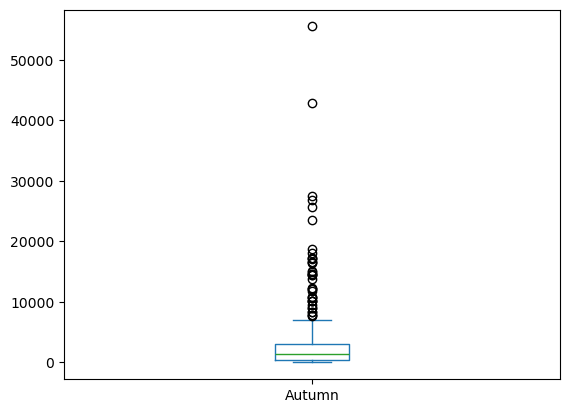

In [119]:
# plot the boxplot of "Autumn" column.
inp0.Autumn.plot.box()
plt.show()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [120]:
inp0.Winter.quantile([1.0,0.99])

1.00    20388.0
0.99     8985.3
Name: Winter, dtype: float64

In [121]:
# Find the maximum and 99th percentile of Winter season.
inp0.Winter.quantile(1.0) - inp0.Winter.quantile(0.99)

11402.69999999999

In [122]:
# Find the maximum and 99th percentile of Summer season.
inp0.Summer.quantile(1.0) - inp0.Summer.quantile(0.99)

21602.999999999996

In [123]:
# Find the maximum and 99th percentile of Spring season.
inp0.Spring.quantile(1.0) - inp0.Spring.quantile(0.99)

4716.8

In [124]:
# Find the maximum and 99th percentile of Autumn season.
inp0.Autumn.quantile(1.0) - inp0.Autumn.quantile(0.99)

31397.999999999975

## Bivariate Analysis 

### Numerical- Categorical analysis

In [136]:
inp0.columns

Index(['Dress_ID', 'Summer', 'Autumn', 'Winter', 'Spring', 'Style', 'Price',
       'Rating', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'Material',
       'FabricType', 'Decoration', 'Pattern Type', 'Recommendation'],
      dtype='object')

In [137]:
inp0.groupby('Price')["Rating"].mean()

Price
Average      3.454430
High         2.914286
Low          3.731481
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [127]:
# Find the Mean of Ratings for each Price category.
# ans : HIGH

In [139]:
inp0.groupby('Style')["Rating"].median()

Style
Brief       4.60
Casual      4.60
Others      0.00
Sexy        4.60
bohemian    4.60
cute        4.60
party       4.70
sexy        4.55
vintage     4.60
work        4.70
Name: Rating, dtype: float64

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [ ]:
# ans : 4.6

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


<Axes: xlabel='Recommendation'>

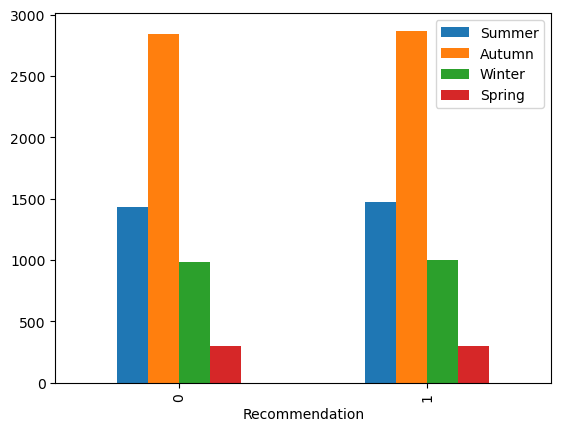

In [140]:
inp0.groupby("Recommendation")[['Summer',"Autumn","Winter","Spring"]].mean().plot.bar()

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [145]:
# Free and medium

<Axes: xlabel='Size'>

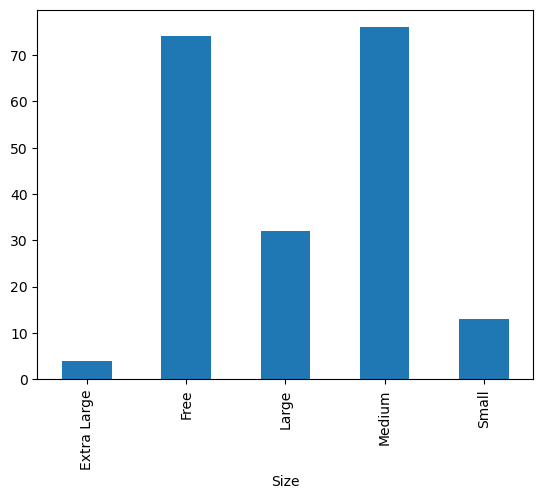

In [146]:
# Size vs Recommendation.
inp0.groupby("Size")["Recommendation"].sum().plot.bar()

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


C:\Users\GWG1\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


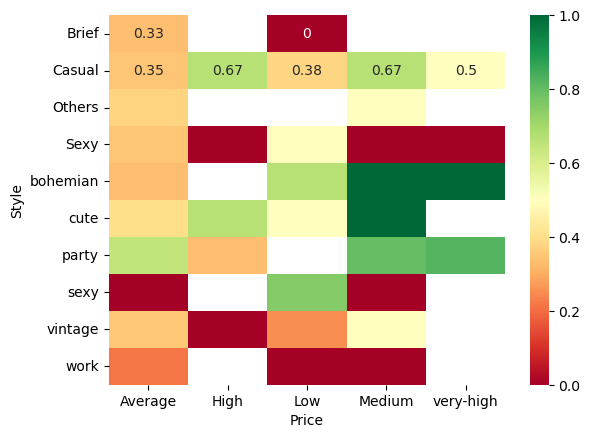

In [155]:
# plot the heat map of Style, price and Recommendation.
sns.heatmap(pd.pivot_table(data=inp0,index="Style",columns = "Price",values="Recommendation"),annot=True,cmap="RdYlGn")
plt.show()

In [159]:
inp0.Recommendation.value_counts(normalize=True)

Recommendation
0    0.577495
1    0.422505
Name: proportion, dtype: float64

C:\Users\GWG1\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


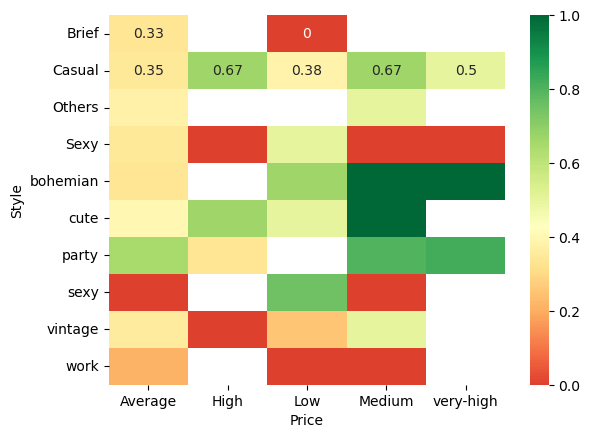

In [156]:
res = pd.pivot_table(data=inp0, index="Style", columns="Price", values="Recommendation")

sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)

plt.show()

In [ ]:
## ans ; medium and Cute

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


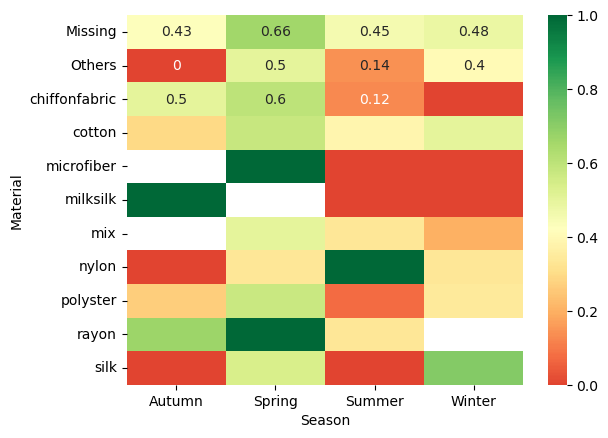

In [162]:
# plot the heat map of Season, material and Recommendation.
res = pd.pivot_table(data=inp0, index="Material", columns="Season", values="Recommendation")

sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.422)

plt.show()

In [161]:
## Ans : Milksilk and Microfiber